# Exploratory Analysis

We'll start by importing the answers to the questionnaire as a CSV file in a pandas DataFrame, and map the answers in a readable way.

In [10]:
answers_file = 'answers_3.csv'
questions_map = 'questions_map.txt'

In [11]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(answers_file, delimiter=";")
print("Dataframe size: ", df.shape)
df = df.dropna()
print("Purged dataframe size: ", df.shape)
df.head()

Dataframe size:  (3330, 37)
Purged dataframe size:  (3210, 37)


,Età?,Titolo di studio,Genere,Hai un profilo Instagram?,Da quanto tempo sei iscritto ad Instagram?,"Quanto tempo pensi di trascorrere su Instagram, in media, al giorno?",Quali sono le arrività che svolgi di solito su Instagram? Per ogni risposta indica un valore da 1 a 4 [Seguire persone che conosco],Quali sono le arrività che svolgi di solito su Instagram? Per ogni risposta indica un valore da 1 a 4 [Caricare foto e/o video],Quali sono le arrività che svolgi di solito su Instagram? Per ogni risposta indica un valore da 1 a 4 [Seguire Influencer o blogger],Quali sono le arrività che svolgi di solito su Instagram? Per ogni risposta indica un valore da 1 a 4 [Seguire pagine di brand o aziende],...,"Per favore valuta le seguenti affermazioni indicando un valore su una scala da 1 a 4 dove 1 indica ""Decisamente no"" e 4 indica ""Decisamente si"" [Penso che gli influencer siano sinceri]","Per favore valuta le seguenti affermazioni indicando un valore su una scala da 1 a 4 dove 1 indica ""Decisamente no"" e 4 indica ""Decisamente si"" [Penso che gli Influencer abbiano una reale esperienza dei prodotti che sponsorizzano]","Pensa alla situazione nella quale hai appena visto un post pubblicato da un influencer che segui, nel quale sponsorizzava un prodotto o un marchio. Quante volte in media ti capita di tenere i comportamenti indicati? Per ogni riga indica un valore da 1 a 4 [Visito la pagina del brand del prodotto sponsorizzato]","Pensa alla situazione nella quale hai appena visto un post pubblicato da un influencer che segui, nel quale sponsorizzava un prodotto o un marchio. Quante volte in media ti capita di tenere i comportamenti indicati? Per ogni riga indica un valore da 1 a 4 [Interagisco (like o commenti) nella pagina del brand o prodotto sponsorizzato]","Pensa alla situazione nella quale hai appena visto un post pubblicato da un influencer che segui, nel quale sponsorizzava un prodotto o un marchio. Quante volte in media ti capita di tenere i comportamenti indicati? Per ogni riga indica un valore da 1 a 4 [Condivido informazioni sul brand o prodotto sponsorizzato]","Pensa alla situazione nella quale hai appena visto un post pubblicato da un influencer che segui, nel quale sponsorizzava un prodotto o un marchio. Quante volte in media ti capita di tenere i comportamenti indicati? Per ogni riga indica un valore da 1 a 4 [Cerco informazioni sul prodotto tramite altri canali]","Pensa alla situazione nella quale hai appena visto un post pubblicato da un influencer che segui, nel quale sponsorizzava un prodotto o un marchio. Quante volte in media ti capita di tenere i comportamenti indicati? Per ogni riga indica un valore da 1 a 4 [Utilizzo Instagram per comunicare direttamente con il brand]","Pensa alla situazione nella quale hai appena visto un post pubblicato da un influencer che segui, nel quale sponsorizzava un prodotto o un marchio. Quante volte in media ti capita di tenere i comportamenti indicati? Per ogni riga indica un valore da 1 a 4 [Ho comprato uno o più prodotti sponsorizzati da un Influencer su Instagram]","Pensa alla situazione nella quale hai appena visto un post pubblicato da un influencer che segui, nel quale sponsorizzava un prodotto o un marchio. Quante volte in media ti capita di tenere i comportamenti indicati? Per ogni riga indica un valore da 1 a 4 [Ho consigliato ad amici o conoscenti di comprare il prodotto sponsorizzato]","Pensa alla situazione nella quale hai appena visto un post pubblicato da un influencer che segui, nel quale sponsorizzava un prodotto o un marchio. Quante volte in media ti capita di tenere i comportamenti indicati? Per ogni riga indica un valore da 1 a 4 [Uso la mia pagina Instagram per mostrare il prodotto acquistato o la mia esperienza con il brand]"
4,19-30 anni,Diploma,M,Si,Tra 6 mesi e 1 anno,Tra 1 e 2 ore,4 (spesso),2 (raramente),2 (raramente),3 (qualche volta),...,3,2,3 (qualche volta),2 (raramente),2 (raramente),4 (spesso),2 (raramente),3 (qualche volta),3 (qualche volta),2 (ra

In [12]:
mapping = open(questions_map, 'r')
questions = mapping.read().split(";")
mapping.close()
mapping = {before: after for before, after in zip(df.columns.values, questions)}
df = df.rename(columns=mapping)
df.head()

,demo-special-age,demo-special-studies,demo-cat-gender,demo-num-have_ig,demo-special-ig_since,demo-special-ig_time_daily,act-num-follow_friends,act-num-share_stuff,act-num-follow_infl,act-num-follow_brands,...,do-num-think_trushworthy,do-num-think_really_tried,num-visit_sponsored_page,num-interact_w_sponsored_brand,num-do_referral_brand,num-cross_information,num-direct_brand_communication,num-did_buy_via_infl,num-did_referred_sponsored_item,num-wannabe_infl
4,19-30 anni,Diploma,M,Si,Tra 6 mesi e 1 anno,Tra 1 e 2 ore,4 (spesso),2 (raramente),2 (raramente),3 (qualche volta),...,3,2,3 (qualche volta),2 (raramente),2 (raramente),4 (spesso),2 (raramente),3 (qualche volta),3 (qualche volta),2 (raramente)
6,19-30 anni,Diploma,F,Si,Tra 6 mesi e 1 anno,Tra 1 e 2 ore,4 (spesso),2 (raramente),4 (spesso),3 (qualche volta),...,3,4 (Decisamente si),4 (spesso),2 (raramente),2 (raramente),4 (spesso),1 (mai),4 (spesso),4 (spesso),4 (spesso)
7,19-30 anni,Laurea Triennale,F,Si,Tra 1 anno e 3 anni,Tra 2 e 4 ore,3 (qualche volta),2 (raramente),4 (spesso),2 (raramente),...,2,1 (Decisamente no),1 (mai),1 (mai),1 (mai),2 (raramente),1 (mai),1 (mai),1 (mai),1 (mai)
8,19-30 anni,Laurea Triennale,F,Si,Tra 6 mesi e 1 anno,Tra 1 e 2 ore,4 (spesso),2 (raramente),3 (qualche volta),2 (raramente),...,2,2,3 (qualche volta),1 (mai),2 (raramente),3 (qualche volta),1 (mai),3 (qualche volta),3 (qualche volta),1 (mai)
11,19-30 anni,Laurea Specialistica,F,Si,Tra 1 anno e 3 anni,Meno di 1 ora,4 (spesso),2 (raramente),4 (spesso),3 (qualche volta),...,2,3,1 (mai),2 (raramente),1 (mai),2 (raramente),1 (mai),1 (mai),1 (mai),1 (mai)


Let's take a look at how many respondents do we have:

In [13]:
print("Respondents: ", df.shape[0])
print("Questions: ", df.shape[1])

Respondents:  3210
Questions:  37


Let's drop the constant variables that are constant:

In [15]:
for c in df.columns.values:
    to_drop = []
    if df[c].value_counts().shape[0] == 1:
        print("Dropping {} because it's constant".format(c))
        to_drop.append(c)
    df = df.drop(columns=to_drop)

Starting analysis: most frequent demographics about respondents.

Demographics features:  5
Plot size:  2 : 3


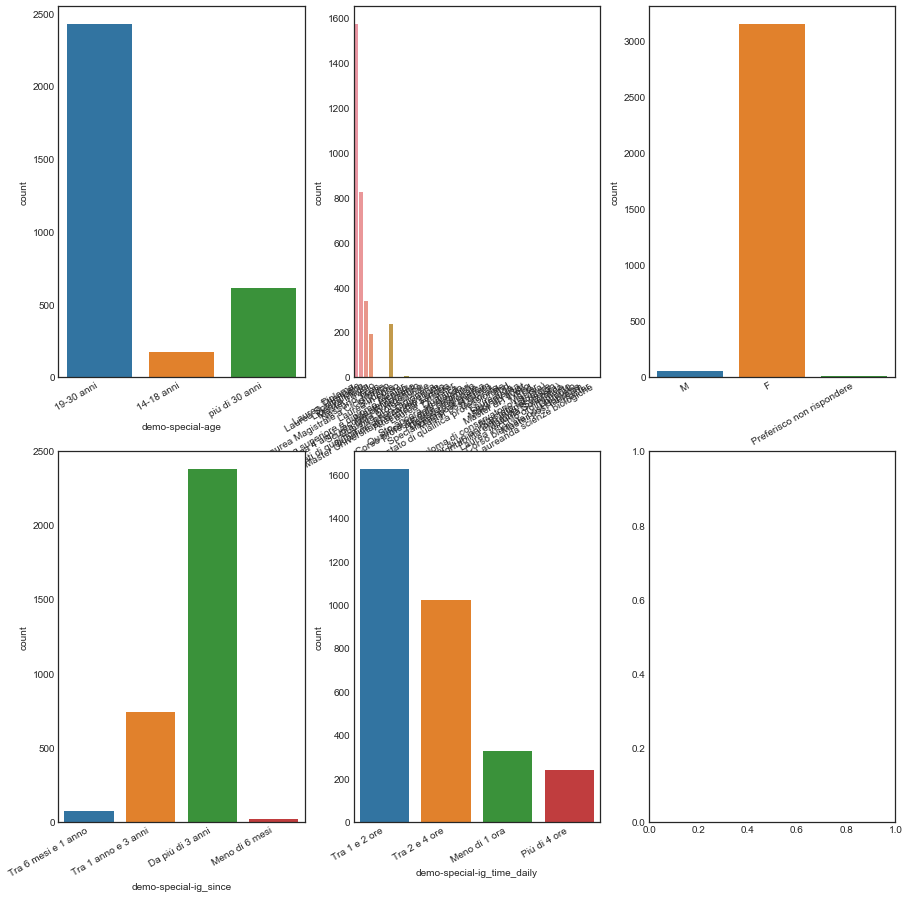

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')

demo_df = df[[c for c in df.columns.values if c[:5] == 'demo-']]
print("Demographics features: ", demo_df.shape[1])

rows = int(demo_df.shape[1]/3)+(demo_df.shape[1]%3>0)
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(15,15))
print("Plot size: ", rows, ":", cols)
answer = 0
for row in range(rows):
    for col in range(cols):
        if answer == demo_df.shape[1]:
            break
        sns.countplot(demo_df[demo_df.columns.values[answer]], ax=ax[row, col])
        plt.setp(ax[row, col].get_xticklabels(), rotation=30, horizontalalignment='right')
        answer += 1

Now, we have to map every question from qualitative answers to quantitative answers:

In [17]:
# First, the categorical answers

from sklearn import preprocessing
les = {}

for c in [c for c in df.columns.values if 'cat-' in c]:
    le = preprocessing.LabelEncoder()
    le.fit(df[c].values)
    df[c] = le.transform(df[c].values)
    les[c] = le

In [18]:
# Features that are numerical, but needs to be handled
for c in [c for c in df.columns.values if 'num-' in c]:
    cc = df[c].astype(str).str.extract('([0-9]{1})', expand=False).str.strip().astype(int)
    df[c] = cc
    print(c, "->", cc.mean())

act-num-follow_friends -> 3.4922118380062304
act-num-share_stuff -> 2.646728971962617
act-num-follow_infl -> 3.445171339563863
act-num-follow_brands -> 2.7869158878504674
act-num-follow_vips -> 2.8934579439252337
act-num-share_brands -> 1.857632398753894
act-num-chat -> 2.1174454828660436
because-num-personality -> 3.51993769470405
because-num-body -> 1.6800623052959502
because-num-topics -> 3.587227414330218
because-num-many_followers -> 1.1554517133956386
because-num-everybody_does -> 1.2853582554517133
because-num-brand_tips -> 2.729595015576324
do-num-trust -> 2.6264797507788162
do-num-follow_advices -> 2.169470404984424
do-num-referral -> 2.2333333333333334
do-num-think_infl_experts -> 2.214330218068536
do-num-think_trushworthy -> 2.126791277258567
do-num-think_really_tried -> 2.182242990654206
num-visit_sponsored_page -> 2.58816199376947
num-interact_w_sponsored_brand -> 1.670404984423676
num-do_referral_brand -> 1.4118380062305296
num-cross_information -> 2.6707165109034268
num-

In [19]:
# Let's plot numerical data, to get a glimpse of how things are going

num_df = df[[c for c in df.columns.values if 'num-' in c]]
num_df.describe()

,act-num-follow_friends,act-num-share_stuff,act-num-follow_infl,act-num-follow_brands,act-num-follow_vips,act-num-share_brands,act-num-chat,because-num-personality,because-num-body,because-num-topics,...,do-num-think_trushworthy,do-num-think_really_tried,num-visit_sponsored_page,num-interact_w_sponsored_brand,num-do_referral_brand,num-cross_information,num-direct_brand_communication,num-did_buy_via_infl,num-did_referred_sponsored_item,num-wannabe_infl
count,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,...,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.00000,3210.000000,3210.000000,3210.000000
mean,3.492212,2.646729,3.445171,2.786916,2.893458,1.857632,2.117445,3.519938,1.680062,3.587227,...,2.126791,2.182243,2.588162,1.670405,1.411838,2.670717,1.46729,1.925234,1.693146,1.246417
std,0.707504,0.743810,0.679773,0.877021,0.856766,0.874118,0.873188,0.738308,0.850352,0.672219,...,0.724713,0.773588,0.826401,0.791291,0.650898,0.882457,0.72292,0.868057,0.828886,0.603842
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,3.000000,1.000000,3.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.00000,1.000000,1.000000,1.000000
50%,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,2.000000,4.000000,1.000000,4.000000,...,2.000000,2.000000,3.000000,1.000000,1.000000,3.000000,1.00000,2.000000,1.000000,1.000000
75%,4.000000,3.000000,4.000000,3.000000,4.000000,2.000000,3.000000,4.000000,2.000000,4.000000,...,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.00000,3.000000,2.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000


In [457]:
# Then, special cases, that needs to be taken into ad-hoc consideration
# Features that are numerical, but needs to be handled
for c in [c for c in df.columns.values if 'special-' in c]:
    print(c, "->", df[c].unique())

demo-special-age -> ['19-30 anni' '14-18 anni']
demo-special-studies -> ['Diploma' 'Laurea Specialistica' 'Laurea Triennale' 'Licenza Media'
 'Medie' 'Studente']
demo-special-ig_since -> ['Tra 6 mesi e 1 anno' 'Da più di 3 anni' 'Tra 1 anno e 3 anni'
 'Meno di 6 mesi']
demo-special-ig_time_daily -> ['Tra 1 e 2 ore' 'Più di 4 ore' 'Tra 2 e 4 ore' 'Meno di 1 ora']
special-infl_followers -> ['da 100.000 a 500.000, da 500.000 a 1 Milione'
 'da 3.000 a 20.000, da 100.000 a 500.000'
 'da 100.000 a 500.000, da 500.000 a 1 Milione, da 1 Milione in su'
 'da 20.000 a 100.000, da 100.000 a 500.000' 'da 1 Milione in su'
 'da 20.000 a 100.000' 'da 500.000 a 1 Milione, da 1 Milione in su'
 'da 3.000 a 20.000, da 20.000 a 100.000'
 'da 100.000 a 500.000, da 1 Milione in su'
 'da 3.000 a 20.000, da 1 Milione in su' 'da 500.000 a 1 Milione'
 'da 3.000 a 20.000' 'da 3.000 a 20.000, da 500.000 a 1 Milione'
 'da 20.000 a 100.000, da 1 Milione in su'
 'da 3.000 a 20.000, da 100.000 a 500.000, da 1 Milione 

In [20]:
import re

def map_followers(s):
    s = s.replace("1 Milione", "1000000").replace(".", "")
    p = re.compile("([0-9]+)")
    rng = [int(x) for x in p.findall(s)]
    return int(sum(rng)/len(rng))

def map_age(s):
    if '14' in s:
        return 0
    if '19' in s:
        return 1
    if '30' in s:
        return 2
    print(s)
    return -1

def map_ig_since(s):
    if 'Meno di 6' in s:
        return 0
    if 'Tra 6' in s:
        return 1
    if 'Tra 1' in s:
        return 2
    if 'Da più di 3' in s:
        return 3
    print(s)
    return -1

def map_ig_time(s):
    if 'Meno di' in s:
        return 0
    if 'Tra 1' in s:
        return 1
    if 'Tra 2' in s:
        return 2
    if 'Più di' in s:
        return 3
    print(s)
    return -1

def map_studies(s):
    s = s.lower()
    if ("triennale" in s) or ("laurea" in s) or ("biennale" in s):
        return 3
    if ("laurea specialistica" in s) or ("speciali" in s):
        return 4
    if ("master" in s) or ("dottorato" in s) or ("phd" in s):
        return 5
    if ("maturit" in s) or ("studente" in s) or ("liceo" in s):
        return 1
    if (s == "diploma") or ("superiori" in s) or ("diploma" in s):
        return 2
    if ("medie" in s) or ("licenza media" in s) or ("corso" in s) or ("qualifica" in s) or ("attestato" in s) or ("studiando" in s) or ("scuola" in s):
        return 0
    if ('make up artis' in s):
        return 0
    print(s)
    return -1

def map_infl(s):
    if "N" in s:
        return 0
    if "S" in s:
        return 1
    print(s)
    return -1

mapping_functions = {
    'demo-special-studies': map_studies,
    'demo-special-ig_time_daily': map_ig_time,
    'demo-special-ig_since': map_ig_since,
    'demo-special-age': map_age,
    'special-infl_followers': map_followers,
}

In [21]:
for key, function in mapping_functions.items():
    df[key] = df[key].apply(function).astype(int)
    print("{} 's unmapped items: ".format(key), df[df[key] == -1].shape[0])

demo-special-studies 's unmapped items:  0
demo-special-ig_time_daily 's unmapped items:  0
demo-special-ig_since 's unmapped items:  0
demo-special-age 's unmapped items:  0
special-infl_followers 's unmapped items:  0


In [460]:
df.dtypes

demo-special-age                    int64
demo-special-studies                int64
demo-cat-gender                     int64
demo-special-ig_since               int64
demo-special-ig_time_daily          int64
act-num-follow_friends              int64
act-num-share_stuff                 int64
act-num-follow_infl                 int64
act-num-follow_brands               int64
act-num-follow_vips                 int64
act-num-share_brands                int64
act-num-chat                        int64
mul-how_discovered_infl            object
mul-infl_verticals                 object
special-infl_followers              int64
because-num-personality             int64
because-num-body                    int64
because-num-topics                  int64
because-num-many_followers          int64
because-num-everybody_does          int64
because-num-brand_tips              int64
do-num-trust                        int64
do-num-follow_advices               int64
do-num-referral                   

In [24]:
# Let's ignore complex mutiple answers for the time being
df_min = df[[c for c in df.columns.values if 'mul-' not in c]]

In [25]:
# Let's define an entropy formula

import numpy as np
from math import log, e

def entropy(labels, base=None):
    """ Computes entropy of label distribution. """
    n_labels = len(labels)
    if n_labels <= 1:
        return 0
    value, counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)
    if n_classes <= 1:
        return 0
    ent = 0.
    # Compute entropy
    base = e if base is None else base
    for i in probs:
        ent -= i * log(i, base)
    return ent

In [26]:
means = {}
stds = {}
ents = {}
exts = {}

for c in df_min.columns.values:
    cc = df_min[c]
    c_nice = c.split("-")[-1]
    means[c_nice] = cc.mean()
    stds[c_nice] = cc.std()
    ents[c_nice] = entropy(cc.values)
    if 'num-' in c:
        exts[c_nice] = abs((cc.mean() - 3)/2)
    
ents_srt = sorted(ents.items(), key=lambda x: x[1])
print("Least 5 controversial questions:")
for ex in ents_srt[:5]:
    print("\t{} -> {} [{}]".format(ex[0], round(means[ex[0]], 2), round(ex[1], 2)))
    
print()
print("Top 5 controversial questions:")
for ex in ents_srt[-5:]:
    print("\t{} -> {} [{}]".format(ex[0], round(means[ex[0]], 2), round(ex[1], 2)))

print()
print("5 closest to extremes questions:")
for ex in sorted(exts.items(), key=lambda x: x[1])[-5:]:
    print("\t{} -> {} [{}]".format(ex[0], round(means[ex[0]], 2), round(ex[1], 2)))

Least 5 controversial questions:
	gender -> 0.02 [0.1]
	many_followers -> 1.16 [0.45]
	wannabe_infl -> 1.25 [0.6]
	everybody_does -> 1.29 [0.68]
	ig_since -> 2.7 [0.68]

Top 5 controversial questions:
	follow_brands -> 2.79 [1.25]
	cross_information -> 2.67 [1.26]
	brand_tips -> 2.73 [1.3]
	referral -> 2.23 [1.33]
	infl_followers -> 435064.73 [2.57]

5 closest to extremes questions:
	direct_brand_communication -> 1.47 [0.77]
	do_referral_brand -> 1.41 [0.79]
	everybody_does -> 1.29 [0.86]
	wannabe_infl -> 1.25 [0.88]
	many_followers -> 1.16 [0.92]


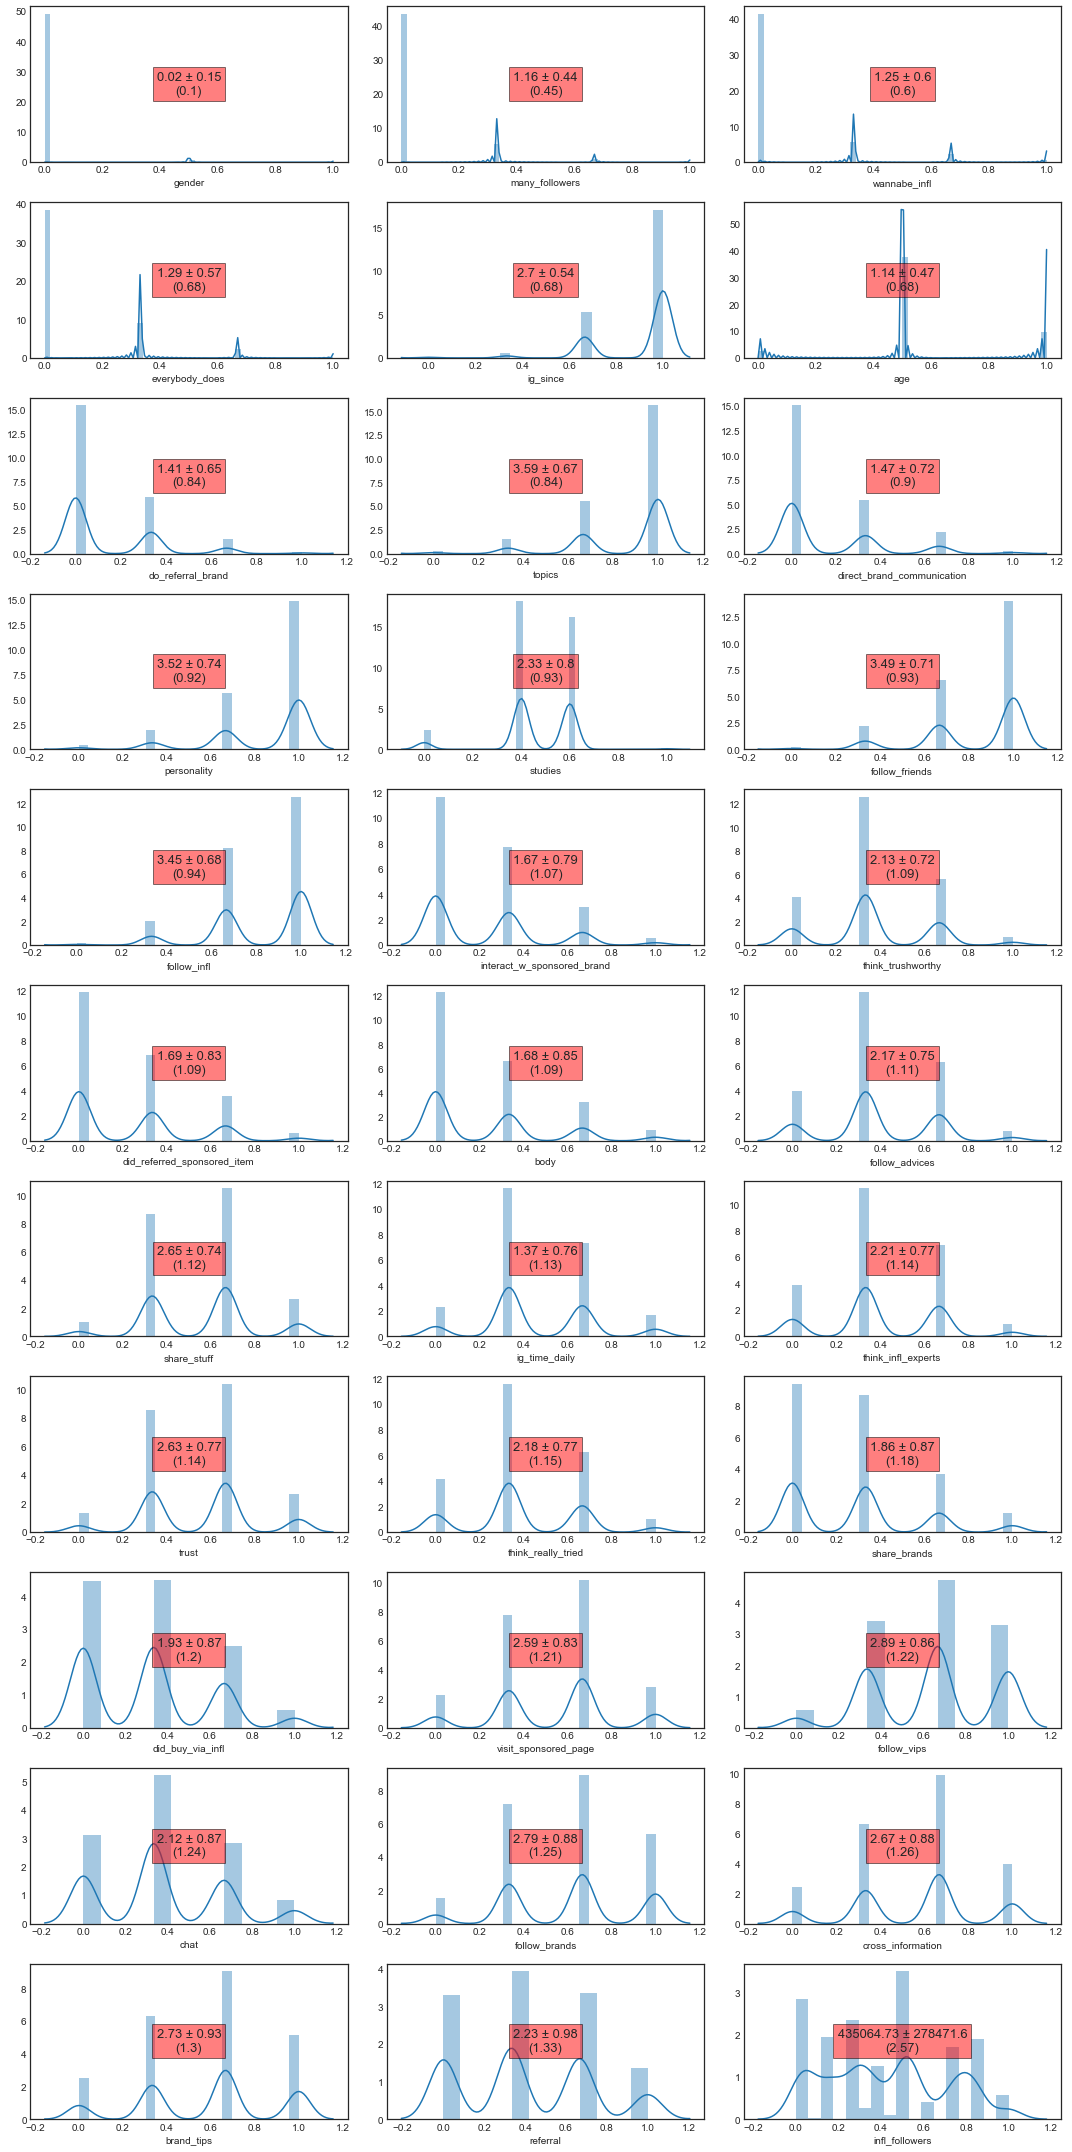

In [27]:
# Let's standardize the columns, and adapt features names for logging
df_plot = df_min.rename(columns={c: c.split("-")[-1] for c in df.columns.values}).copy()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_plot[df_plot.columns] = scaler.fit_transform(df_plot[df_plot.columns])

# Plot the whole thing, ordered by entropy
rows = int(df_plot.shape[1]/3)+(df_plot.shape[1]%3>0)
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(15,30))
answer = 0
for row in range(rows):
    for col in range(cols):
        if answer == df_plot.shape[1]:
            break
        feature_name = ents_srt[answer][0]
        cc = df_plot[feature_name]
        sns.distplot(cc, ax=ax[row, col])
        ax[row, col].text(0.5, 0.5, str(round(means[feature_name], 2)) + \
                                    " ± " + str(round(stds[feature_name], 2)) + \
                                    "\n({})".format(round(ents[feature_name], 2)), 
                          fontsize=13, 
                          horizontalalignment='center', 
                          verticalalignment='center', 
                          transform=ax[row, col].transAxes,
                          bbox=dict(facecolor='red', alpha=0.5))
        answer += 1
        
fig.tight_layout()

Let's add the multi-category answers to the mix

In [28]:
df_mul = df[[c for c in df.columns.values if 'mul-' in c]]
df_mul.head()

,mul-how_discovered_infl,mul-infl_verticals
4,"Consiglio di amici, Tramite i suggerimenti di ...","Viaggi, Tech"
6,"Consiglio di amici, Arrivando alla loro pagina...","Fashion/Lifestyle, Beauty/Make Up"
7,"Consiglio di amici, Ne ho sentito parlare o li...","Fashion/Lifestyle, Viaggi"
8,Arrivando alla loro pagina da altre pagine che...,"Fashion/Lifestyle, Food"
11,Ne ho sentito parlare o li seguo su altri Soci...,"Fashion/Lifestyle, Beauty/Make Up"


In [29]:
for c in df_mul.columns.values:
    print(c)
    s = [x for x in set(', '.join(list(df_mul[c].values)).split(", "))]
    print(s)
    print()

mul-how_discovered_infl
['Consiglio di amici', 'Arrivando alla loro pagina da altre pagine che seguo', 'Ne ho sentito parlare o li seguo su altri Social Network', 'Arrivando alla loro pagina dalla pagina di brand o aziende', 'Li ho cercati in base ai miei interessi', 'Tramite i suggerimenti di Instagram']

mul-infl_verticals
['Viaggi', 'Beauty/Make Up', 'Sport/Fitness', 'Fashion/Lifestyle', 'Tech', 'Food']



In [30]:
def map_s_discovered_infl(s):
    if 'interessi' in s:
        return 'interests'
    if 'amici' in s:
        return 'friends'
    if 'suggerimenti di Instagram' in s:
        return 'explore'
    if 'da altre pagine' in s:
        return 'algo_recommended'
    if 'dalla pagina di brand' in s:
        return 'sponsor'
    if 'sentito parlare o' in s:
        return 'wom'
    return '-1'

def map_s_verticals(s):
    if 'Viaggi' in s:
        return 'travel'
    if 'Fashion' in s:
        return 'fashion'
    if 'Make' in s:
        return 'beauty'
    if 'Tech' in s:
        return 'tech'
    if 'Fitness' in s:
        return 'fitness'
    if 'Food' in s:
        return 'food'
    return '-1'

def map_multiples(s, fun):
    qs = s.split(", ")
    rs = []
    for q in qs:
        rs.append(fun(q))
    return ','.join(rs)

mapping_functions = {
    'mul-how_discovered_infl': map_s_discovered_infl,
    'mul-infl_verticals': map_s_verticals,
}
for key, function in mapping_functions.items():
    df_mul[key] = df_mul[key].apply(lambda x: map_multiples(x, function)).astype(str)
    print("{} 's unmapped items: ".format(key), df_mul[df_mul[key] == "-1"].shape[0])

mul-how_discovered_infl 's unmapped items:  0
mul-infl_verticals 's unmapped items:  0


In [31]:
df_mul.head()

,mul-how_discovered_infl,mul-infl_verticals
4,"friends,explore","travel,tech"
6,"friends,algo_recommended,interests","fashion,beauty"
7,"friends,wom","fashion,travel"
8,"algo_recommended,explore","fashion,food"
11,wom,"fashion,beauty"


In [32]:
set_keys = {}
for c in df_mul.columns.values:
    set_keys[c] = [x for x in set(','.join(list(df_mul[c].values)).split(","))]
    
for c, values in set_keys.items():
    for new_col in values:
        if new_col == "-1":
            continue
        rs = []
        for row in range(df_mul.shape[0]):
            rs.append((new_col in df_mul.iloc[row, df_mul.columns.get_loc(c)]) *1)
        df_mul[new_col] = rs

df_mul = df_mul.drop(columns=[c for c in df_mul.columns.values if 'mul-' in c])
df_mul.head()

,sponsor,wom,algo_recommended,explore,interests,friends,beauty,tech,food,fitness,fashion,travel
4,0,0,0,1,0,1,0,1,0,0,0,1
6,0,0,1,0,1,1,1,0,0,0,1,0
7,0,1,0,0,0,1,0,0,0,0,1,1
8,0,0,1,1,0,0,0,0,1,0,1,0
11,0,1,0,0,0,0,1,0,0,0,1,0


In [33]:
# Merging the whole thing together to have an awesome dataset

df_sdt = df_plot.join(df_mul)
df_sdt.head()

,age,studies,gender,ig_since,ig_time_daily,follow_friends,share_stuff,follow_infl,follow_brands,follow_vips,...,algo_recommended,explore,interests,friends,beauty,tech,food,fitness,fashion,travel
4,0.5,0.4,0.5,0.333333,0.333333,1.000000,0.333333,0.333333,0.666667,0.666667,...,0,1,0,1,0,1,0,0,0,1
6,0.5,0.4,0.0,0.333333,0.333333,1.000000,0.333333,1.000000,0.666667,0.666667,...,1,0,1,1,1,0,0,0,1,0
7,0.5,0.6,0.0,0.666667,0.666667,0.666667,0.333333,1.000000,0.333333,1.000000,...,0,0,0,1,0,0,0,0,1,1
8,0.5,0.6,0.0,0.333333,0.333333,1.000000,0.333333,0.666667,0.333333,0.666667,...,1,1,0,0,0,0,1,0,1,0
11,0.5,0.6,0.0,0.666667,0.000000,1.000000,0.333333,1.000000,0.666667,0.333333,...,0,0,0,0,1,0,0,0,1,0


In [34]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

X = df_sdt.values

# PCA ANALYSIS
pca = PCA(n_components=X.shape[1]).fit(X)
ninty_cutoff, nintynine_cutoff = False, False
for ix, variance in enumerate(pca.explained_variance_ratio_.cumsum()):
    if ix == 3:
        print("Variance explained in 3 dimensions: ", variance)
    if (variance >= 0.9) & (not ninty_cutoff):
        ninty_cutoff = True
        print('0.90 cutoff -> ', ix)
    if (variance >= 0.99) & (not nintynine_cutoff):
        nintynine_cutoff = True
        print('0.99 cutoff -> ', ix)

Variance explained in 3 dimensions:  0.3041042438804309
0.90 cutoff ->  29
0.99 cutoff ->  41


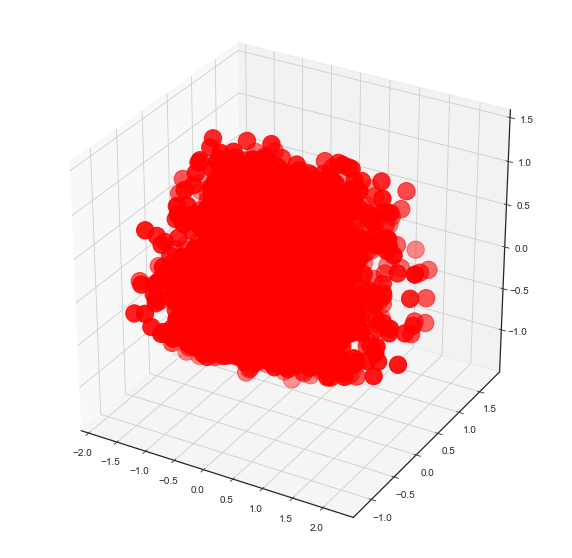

In [35]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

pca_3d = PCA(n_components=3).fit_transform(X)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], s=300, c='r', marker='o')

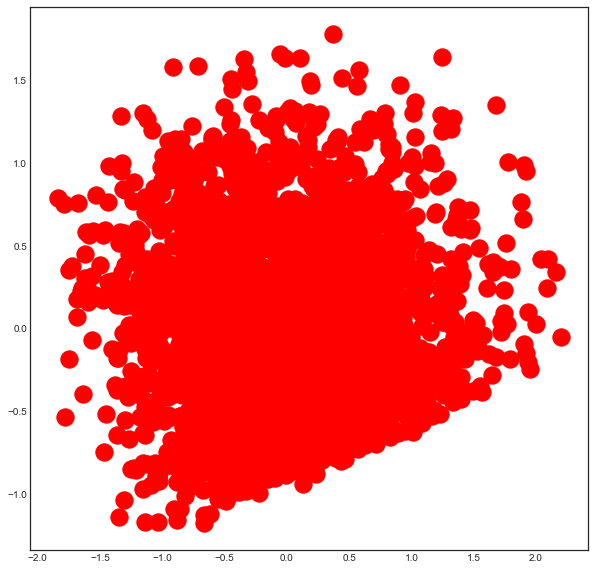

In [36]:
pca_2d = PCA(n_components=2).fit_transform(X)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(pca_2d[:, 0], pca_2d[:, 1], s=300, c='r', marker='o')

Average inertia: 8969.503509534188
Average inertia for reduced data: 7686.556525409936



ValueError: x and y must have same first dimension, but have shapes (3209,) and (49,)

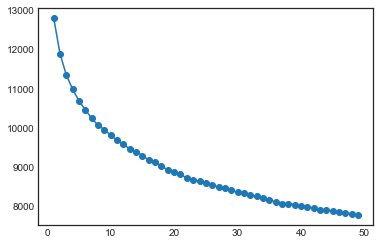

In [37]:
X_reduced = PCA(n_components=29).fit_transform(X)

distortions, distortions_reduced = [], []
for i in range(1, 50):
    # print("Fitting {} clusters".format(i))
    distortions.append(KMeans(n_clusters=i, init='k-means++').fit(X).inertia_)
    if i < X_reduced.shape[0]:
        distortions_reduced.append(KMeans(n_clusters=i, init='k-means++').fit(X_reduced).inertia_)
    
print("Average inertia: {}".format(sum(distortions)/len(distortions)))
print("Average inertia for reduced data: {}".format(sum(distortions_reduced)/len(distortions_reduced)))

print()

plt.plot(range(1, 50), distortions, marker='o')
plt.plot(range(1, X_reduced.shape[0]), distortions_reduced, marker='o')

Average inertia: 10111.988768322162
Average inertia for reduced data: 8822.279219851263



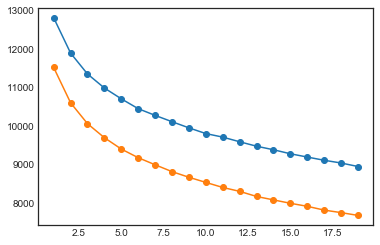

In [39]:
X_reduced = PCA(n_components=29).fit_transform(X)

distortions, distortions_reduced = [], []
for i in range(1, 20):
    # print("Fitting {} clusters".format(i))
    distortions.append(KMeans(n_clusters=i, init='k-means++').fit(X).inertia_)
    distortions_reduced.append(KMeans(n_clusters=i, init='k-means++').fit(X_reduced).inertia_)
    
print("Average inertia: {}".format(sum(distortions)/len(distortions)))
print("Average inertia for reduced data: {}".format(sum(distortions_reduced)/len(distortions_reduced)))

print()

plt.plot(range(1, 20), distortions, marker='o')
plt.plot(range(1, 20), distortions_reduced, marker='o')